In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 10

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 [=========>....................] - ETA: 3s - loss: 2.4271 - accuracy: 0.1016
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 2s 229ms/step - loss: 2.3875 - accuracy: 0.1000 - val_loss: 2.4056 - val_accuracy: 0.1171
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3697 - accuracy: 0.0938
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 2.3601 - accuracy: 0.1000 - val_loss: 2.3690 - val_accuracy: 0.1441
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3503 - accuracy: 0.1250

C:\Users\mezza\anaconda3\envs\GR\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 60ms/step - loss: 2.3371 - accuracy: 0.1061 - val_loss: 2.3375 - val_accuracy: 0.1532
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2999 - accuracy: 0.1562
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 61ms/step - loss: 2.2978 - accuracy: 0.1212 - val_loss: 2.3129 - val_accuracy: 0.1532
Epoch 5/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3000 - accuracy: 0.1328
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 2.3244 - accuracy: 0.1152 - val_loss: 2.2943 - val_accuracy: 0.1081
Epoch 6/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3397 - accuracy: 0.1016
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [========================

Epoch 31/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9468 - accuracy: 0.2969
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 53ms/step - loss: 1.9413 - accuracy: 0.3333 - val_loss: 1.9068 - val_accuracy: 0.3874
Epoch 32/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9308 - accuracy: 0.3438
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 1.9274 - accuracy: 0.3303 - val_loss: 1.8866 - val_accuracy: 0.3874
Epoch 33/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9623 - accuracy: 0.3125
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 58ms/step - loss: 1.9560 - accuracy: 0.3091 - val_loss: 1.8661 - val_accuracy: 0.4234
Epoch 34/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9515 - accuracy: 0.3359
Epoch

1/3 [=========>....................] - ETA: 0s - loss: 1.6024 - accuracy: 0.3828
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 43ms/step - loss: 1.5780 - accuracy: 0.4394 - val_loss: 1.3781 - val_accuracy: 0.6306
Epoch 59/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5256 - accuracy: 0.5156
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 58ms/step - loss: 1.5166 - accuracy: 0.5000 - val_loss: 1.3598 - val_accuracy: 0.6486
Epoch 60/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5403 - accuracy: 0.4766
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 49ms/step - loss: 1.4988 - accuracy: 0.4879 - val_loss: 1.3415 - val_accuracy: 0.6577
Epoch 61/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4793 - accuracy: 0.4531
Epoch 61: saving mo

3/3 [==============================] - 0s 53ms/step - loss: 1.2391 - accuracy: 0.5576 - val_loss: 1.0465 - val_accuracy: 0.7838
Epoch 86/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2826 - accuracy: 0.5703
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 1.2832 - accuracy: 0.5424 - val_loss: 1.0366 - val_accuracy: 0.7838
Epoch 87/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2293 - accuracy: 0.5391
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 1.2587 - accuracy: 0.5242 - val_loss: 1.0267 - val_accuracy: 0.7748
Epoch 88/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2366 - accuracy: 0.5469
Epoch 88: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 54ms/step - loss: 1.2727 - accuracy: 0.5121 - val_loss: 1.

Epoch 113/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0036 - accuracy: 0.6406
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 1.1376 - accuracy: 0.5576 - val_loss: 0.8528 - val_accuracy: 0.8198
Epoch 114/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0514 - accuracy: 0.6562
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 49ms/step - loss: 1.1026 - accuracy: 0.5970 - val_loss: 0.8465 - val_accuracy: 0.8018
Epoch 115/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0914 - accuracy: 0.6406
Epoch 115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 1.0690 - accuracy: 0.6212 - val_loss: 0.8408 - val_accuracy: 0.7838
Epoch 116/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0974 - accuracy: 0.585

1/3 [=========>....................] - ETA: 0s - loss: 0.9847 - accuracy: 0.6406
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 0.9882 - accuracy: 0.6545 - val_loss: 0.7191 - val_accuracy: 0.8649
Epoch 141/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0451 - accuracy: 0.6406
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.9529 - accuracy: 0.6636 - val_loss: 0.7145 - val_accuracy: 0.8649
Epoch 142/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9924 - accuracy: 0.6406
Epoch 142: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.9417 - accuracy: 0.6818 - val_loss: 0.7094 - val_accuracy: 0.8649
Epoch 143/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9961 - accuracy: 0.6641
Epoch 143: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8155 - accuracy: 0.6953
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 0.8666 - accuracy: 0.6818 - val_loss: 0.5821 - val_accuracy: 0.9189
Epoch 168/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8794 - accuracy: 0.7031
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.8644 - accuracy: 0.6970 - val_loss: 0.5776 - val_accuracy: 0.9189
Epoch 169/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8571 - accuracy: 0.6641
Epoch 169: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 60ms/step - loss: 0.8851 - accuracy: 0.6758 - val_loss: 0.5719 - val_accuracy: 0.9189
Epoch 170/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8851 - accuracy: 0.7109
Epoch 170: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7732 - accuracy: 0.7344
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.8226 - accuracy: 0.6727 - val_loss: 0.4735 - val_accuracy: 0.9550
Epoch 195/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7351 - accuracy: 0.7578
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.7936 - accuracy: 0.7394 - val_loss: 0.4707 - val_accuracy: 0.9550
Epoch 196/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7187 - accuracy: 0.7578
Epoch 196: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.7484 - accuracy: 0.7545 - val_loss: 0.4679 - val_accuracy: 0.9550
Epoch 197/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7321 - accuracy: 0.7500
Epoch 197: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6158 - accuracy: 0.8047
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 59ms/step - loss: 0.6662 - accuracy: 0.7788 - val_loss: 0.3872 - val_accuracy: 0.9640
Epoch 222/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6146 - accuracy: 0.8281
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 0.7122 - accuracy: 0.7636 - val_loss: 0.3845 - val_accuracy: 0.9640
Epoch 223/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6255 - accuracy: 0.8281
Epoch 223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 0.6799 - accuracy: 0.7818 - val_loss: 0.3819 - val_accuracy: 0.9640
Epoch 224/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7302 - accuracy: 0.7344
Epoch 224: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6484 - accuracy: 0.7734
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 58ms/step - loss: 0.7168 - accuracy: 0.7364 - val_loss: 0.3248 - val_accuracy: 0.9820
Epoch 249/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6382 - accuracy: 0.7969
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 59ms/step - loss: 0.6759 - accuracy: 0.7606 - val_loss: 0.3223 - val_accuracy: 0.9820
Epoch 250/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6573 - accuracy: 0.8047
Epoch 250: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 56ms/step - loss: 0.6816 - accuracy: 0.7879 - val_loss: 0.3198 - val_accuracy: 0.9820
Epoch 251/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6296 - accuracy: 0.7969
Epoch 251: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.5780 - accuracy: 0.8047
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 49ms/step - loss: 0.6163 - accuracy: 0.7758 - val_loss: 0.2704 - val_accuracy: 0.9820
Epoch 276/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6559 - accuracy: 0.7812
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 0.6092 - accuracy: 0.8000 - val_loss: 0.2698 - val_accuracy: 0.9820
Epoch 277/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6124 - accuracy: 0.7891
Epoch 277: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.6026 - accuracy: 0.7879 - val_loss: 0.2696 - val_accuracy: 0.9820
Epoch 278/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6851 - accuracy: 0.7422
Epoch 278: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.5472 - accuracy: 0.8281
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 54ms/step - loss: 0.5849 - accuracy: 0.7909 - val_loss: 0.2417 - val_accuracy: 0.9820
Epoch 303/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5654 - accuracy: 0.7969
Epoch 303: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 53ms/step - loss: 0.6057 - accuracy: 0.7909 - val_loss: 0.2410 - val_accuracy: 0.9820
Epoch 304/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5591 - accuracy: 0.7969
Epoch 304: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.5926 - accuracy: 0.7818 - val_loss: 0.2389 - val_accuracy: 0.9820
Epoch 305/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6674 - accuracy: 0.7344
Epoch 305: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.4887 - accuracy: 0.8594
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 54ms/step - loss: 0.5264 - accuracy: 0.8212 - val_loss: 0.2047 - val_accuracy: 0.9820
Epoch 330/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6826 - accuracy: 0.7109
Epoch 330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.6402 - accuracy: 0.7697 - val_loss: 0.2048 - val_accuracy: 0.9820
Epoch 331/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6239 - accuracy: 0.7578
Epoch 331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 0.5335 - accuracy: 0.8000 - val_loss: 0.2051 - val_accuracy: 0.9820
Epoch 332/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4250 - accuracy: 0.8750
Epoch 332: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.5349 - accuracy: 0.8203
Epoch 356: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 62ms/step - loss: 0.5115 - accuracy: 0.8303 - val_loss: 0.1945 - val_accuracy: 0.9820
Epoch 357/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5070 - accuracy: 0.8438
Epoch 357: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 75ms/step - loss: 0.5298 - accuracy: 0.8212 - val_loss: 0.1935 - val_accuracy: 0.9820
Epoch 358/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8073 - accuracy: 0.7188
Epoch 358: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 67ms/step - loss: 0.6330 - accuracy: 0.7667 - val_loss: 0.1933 - val_accuracy: 0.9820
Epoch 359/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5100 - accuracy: 0.8203
Epoch 359: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.4308 - accuracy: 0.8125
Epoch 383: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 55ms/step - loss: 0.4670 - accuracy: 0.8364 - val_loss: 0.1697 - val_accuracy: 0.9910
Epoch 384/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5136 - accuracy: 0.8281
Epoch 384: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 64ms/step - loss: 0.4693 - accuracy: 0.8273 - val_loss: 0.1680 - val_accuracy: 0.9910
Epoch 385/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5347 - accuracy: 0.8125
Epoch 385: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 64ms/step - loss: 0.5082 - accuracy: 0.8364 - val_loss: 0.1668 - val_accuracy: 0.9820
Epoch 386/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4464 - accuracy: 0.8672
Epoch 386: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.5295 - accuracy: 0.8438
Epoch 410: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.5141 - accuracy: 0.8424 - val_loss: 0.1480 - val_accuracy: 0.9910
Epoch 411/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5394 - accuracy: 0.7812
Epoch 411: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.5167 - accuracy: 0.8152 - val_loss: 0.1488 - val_accuracy: 0.9910
Epoch 412/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4524 - accuracy: 0.8438
Epoch 412: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.4501 - accuracy: 0.8455 - val_loss: 0.1497 - val_accuracy: 0.9910
Epoch 413/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3763 - accuracy: 0.8672
Epoch 413: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.4665 - accuracy: 0.8203
Epoch 437: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 44ms/step - loss: 0.4468 - accuracy: 0.8485 - val_loss: 0.1352 - val_accuracy: 0.9910
Epoch 438/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3998 - accuracy: 0.8672
Epoch 438: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.4767 - accuracy: 0.8455 - val_loss: 0.1354 - val_accuracy: 0.9910
Epoch 439/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4761 - accuracy: 0.8594
Epoch 439: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 44ms/step - loss: 0.5095 - accuracy: 0.8333 - val_loss: 0.1358 - val_accuracy: 0.9910
Epoch 440/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4514 - accuracy: 0.8438
Epoch 440: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.5016 - accuracy: 0.8281
Epoch 464: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 0.4894 - accuracy: 0.8333 - val_loss: 0.1269 - val_accuracy: 0.9910
Epoch 465/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3752 - accuracy: 0.8906
Epoch 465: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.4155 - accuracy: 0.8636 - val_loss: 0.1266 - val_accuracy: 0.9910
Epoch 466/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4736 - accuracy: 0.8594
Epoch 466: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 44ms/step - loss: 0.4173 - accuracy: 0.8636 - val_loss: 0.1266 - val_accuracy: 0.9910
Epoch 467/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.3771 - accuracy: 0.9141
Epoch 467: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.4351 - accuracy: 0.8750
Epoch 491: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.4480 - accuracy: 0.8545 - val_loss: 0.1184 - val_accuracy: 0.9910
Epoch 492/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4153 - accuracy: 0.8359
Epoch 492: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 0.4487 - accuracy: 0.8364 - val_loss: 0.1173 - val_accuracy: 0.9910
Epoch 493/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5221 - accuracy: 0.8047
Epoch 493: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 57ms/step - loss: 0.4682 - accuracy: 0.8364 - val_loss: 0.1164 - val_accuracy: 0.9910
Epoch 494/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4232 - accuracy: 0.8750
Epoch 494: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.3440 - accuracy: 0.8750
Epoch 518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 0.4090 - accuracy: 0.8485 - val_loss: 0.1081 - val_accuracy: 0.9910
Epoch 519/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4434 - accuracy: 0.8594
Epoch 519: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 0.4499 - accuracy: 0.8424 - val_loss: 0.1074 - val_accuracy: 0.9910
Epoch 520/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8359
Epoch 520: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 43ms/step - loss: 0.4142 - accuracy: 0.8515 - val_loss: 0.1079 - val_accuracy: 0.9910
Epoch 521/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.4941 - accuracy: 0.8281
Epoch 521: sa

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 31ms/step - loss: 0.1124 - accuracy: 0.9910


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 165ms/step
[5.1797748e-09 7.9269942e-09 9.9998498e-01 2.9883176e-13 3.3720469e-06
 8.2690349e-07 2.4260660e-07 5.7524260e-13 4.5498774e-12 1.0592817e-05]
2


# 混同行列

4/4 [==============================] - 0s 2ms/step


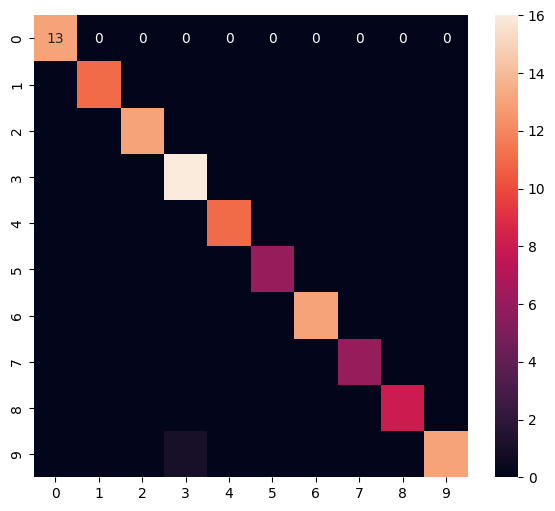

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       0.94      1.00      0.97        16
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         8
           9       1.00      0.93      0.96        14

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\mezza\anaconda3\envs\GR\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mezza\AppData\Local\Temp\tmpdz9r0n9x\assets


INFO:tensorflow:Assets written to: C:\Users\mezza\AppData\Local\Temp\tmpdz9r0n9x\assets


6808

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.17977439e-09 7.92699328e-09 9.99984980e-01 2.98831814e-13
 3.37204665e-06 8.26904227e-07 2.42606831e-07 5.75242653e-13
 4.54989475e-12 1.05928175e-05]
2
